In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import glob
import corner, emcee, tqdm
from tweezepy import AV, PSD, MLE

In [2]:
folderPath = 'C:\\Users\\Perkins Lab\\Desktop\\Caleb Maddry\\Data\\2024\\August\\27\\400fps\\Data2TSV'

fileList = glob.glob(folderPath + '/*.txt')
concatDF = pd.DataFrame(pd.read_table(fileList[0],names=['inf','zMotor', 'rotmotor', 'xRefBead1', 'yRefBead1', 'zRefBead1', 'xExpBead1','yExpBead1','zExpBead1','xExpBead2','yExpBead2','zExpBead2' ]), columns=['inf','zMotor', 'rotmotor', 'xRefBead1', 'yRefBead1', 'zRefBead1', 'xExpBead1','yExpBead1','zExpBead1','xExpBead2','yExpBead2','zExpBead2'])

for i  in range(1, len(fileList)):
    data = pd.read_table(fileList[i],names=['inf','zMotor', 'rotmotor', 'xRefBead1', 'yRefBead1', 'zRefBead1','xExpBead1','yExpBead1','zExpBead1','xExpBead2','yExpBead2','zExpBead2' ])
    df = pd.DataFrame(data, columns=['inf','zMotor', 'rotmotor', 'xRefBead1', 'yRefBead1', 'zRefBead1', 'xExpBead1','yExpBead1','zExpBead1','xExpBead2','yExpBead2','zExpBead2' ])
    concatDF = pd.concat([concatDF, df], ignore_index='inner')

In [78]:
xConv = 64.6
yConv = 64.7
zMotor = concatDF['zMotor']

xRefBead = concatDF['xRefBead1']*xConv
yRefBead = concatDF['yRefBead1']*yConv
zRefBead = concatDF['zRefBead1']*1000

xExpBead1 = concatDF['xExpBead1']*xConv
yExpBead1 = concatDF['yExpBead1']*yConv
zExpBead1 = concatDF['zExpBead1']*1000

xExpBead2 = concatDF['xExpBead2']*xConv
yExpBead2 = concatDF['yExpBead2']*yConv
zExpBead2 = concatDF['zExpBead2']*1000

timeVector = pd.Series(range(len(zExpBead1)))/400

## Good beads
beadX = xExpBead1 - xRefBead
beadY = yExpBead1 - yRefBead
beadZ = zExpBead1- zRefBead

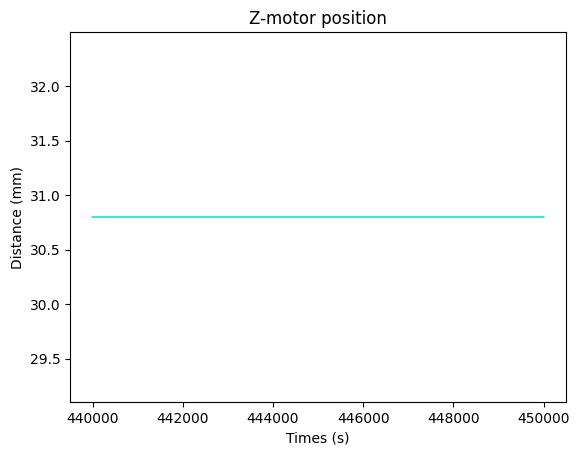

In [119]:
fig = plt.plot(zMotor[440000:450000], color = '#4DDDD6')
plt.xlabel('Times (s)')
plt.ylabel('Distance (mm)')
plt.title('Z-motor position')

# Used the commented out zMotor plot to figure these below:
lowForceStart = 386000
lowForceEnd = 396000

highForceStart = 440000
highForceEnd = 450000

medForceStart = 129000
medForceEnd = 151000

forceExtStart = 170000
forceExtEnd = 380000

forceExtTimeVector = pd.Series(range(forceExtEnd - forceExtStart))/400

The high force x-variance is:  259.62971619658225
The high force y-variance is:  558.5346161800724
The high force z-variance is:  18.789339256399312


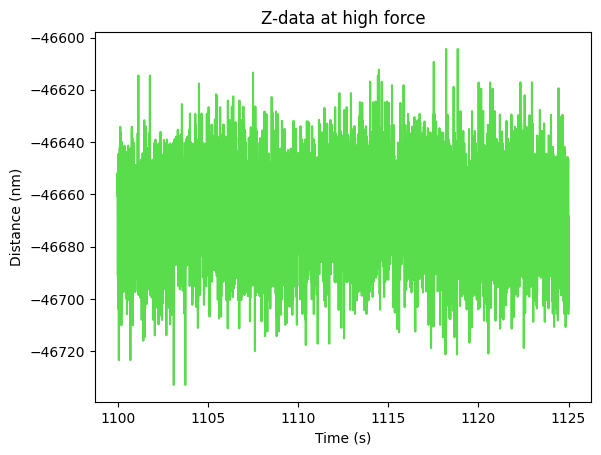

In [120]:
## High force
fig1 = plt.plot(timeVector[highForceStart:highForceEnd], beadX[highForceStart:highForceEnd], color='#5ADD4D') 
plt.title('Z-data at high force')
plt.xlabel('Time (s)')
plt.ylabel('Distance (nm)')

# the x axis has the lower variance so it is most likely the 

print('The high force x-variance is: ', np.var(beadX[highForceStart:highForceEnd]))
print('The high force y-variance is: ', np.var(beadY[highForceStart:highForceEnd]))
print('The high force z-variance is: ', np.var(beadZ[highForceStart:highForceEnd]))

The low force x-variance is:  19768.359212431205
The low force y-variance is:  189554.2738482808
The low force z-variance is:  6072.623705614399


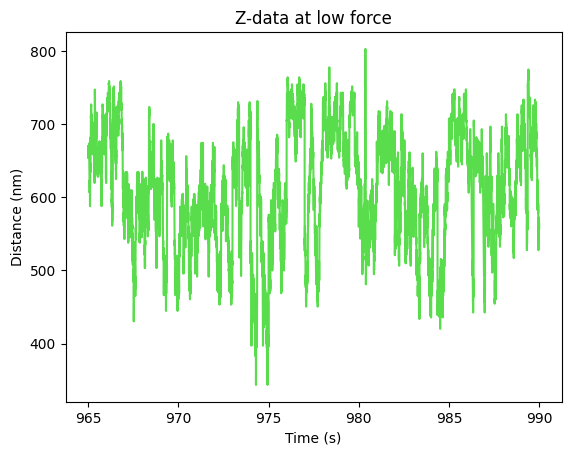

In [121]:
## Low force
fig =  plt.plot(timeVector[lowForceStart:lowForceEnd],beadZ[lowForceStart:lowForceEnd], color = '#5ADD4D')
plt.title('Z-data at low force')
plt.xlabel('Time (s)')
plt.ylabel('Distance (nm)')

print('The low force x-variance is: ', np.var(beadX[lowForceStart:lowForceEnd]))
print('The low force y-variance is: ', np.var(beadY[lowForceStart:lowForceEnd]))
print('The low force z-variance is: ', np.var(beadZ[lowForceStart:lowForceEnd]))

The glass position is:  379.31766666666664


Text(0.5, 0.01, 'Distance (nm)')

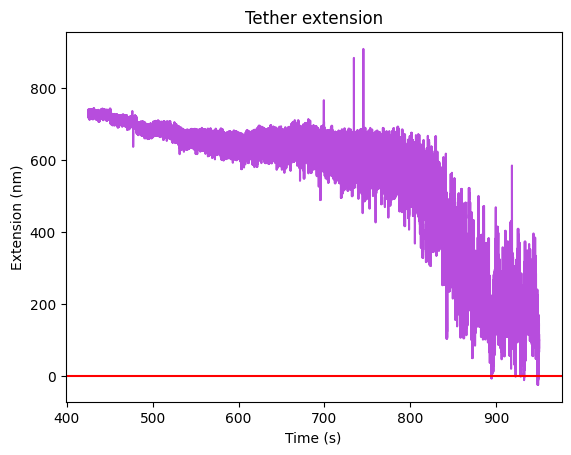

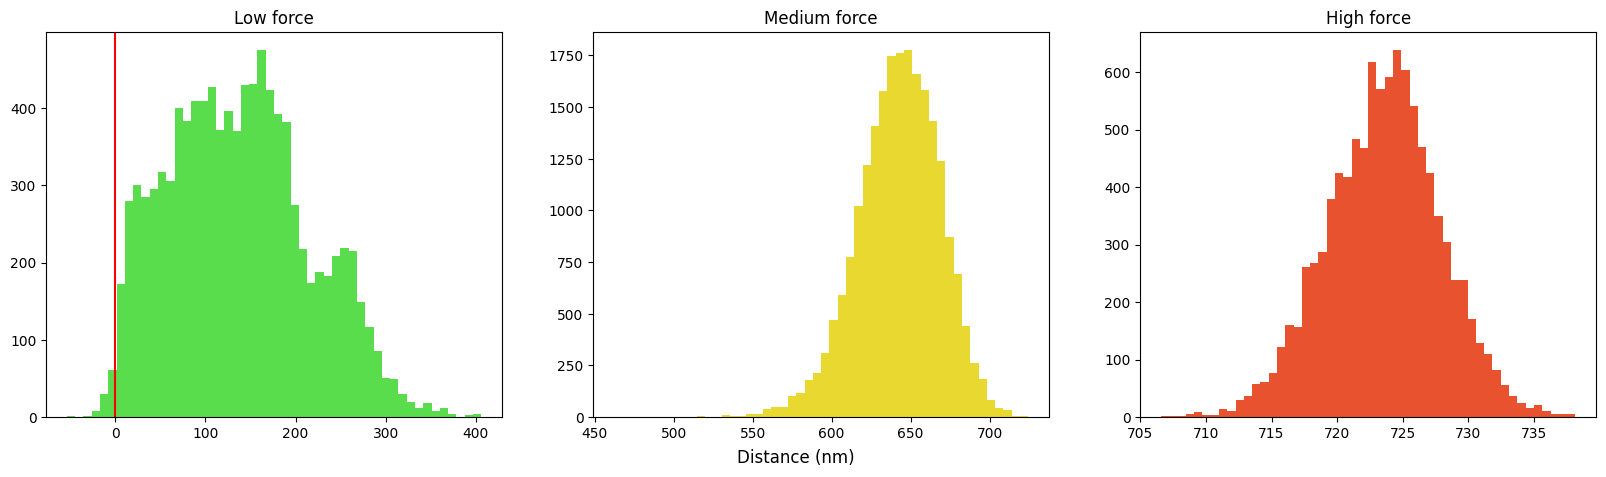

In [129]:
# Now we try and fiund the glass position
beadDiameter = 2800

# plt.figure(1)
# fig = plt.hist(-beadZ[lowForceStart:lowForceEnd], bins = 100, color='#5ADD4D')
# plt.title('Z-data at low force')
# plt.ylabel('Count')
# plt.xlabel('Distance (nm)')

sortedZdata = np.sort(beadZ[lowForceStart:lowForceEnd])

glassPosition = np.mean(sortedZdata[0:30])
print('The glass position is: ', glassPosition)

tetherExtension = -beadZ + glassPosition + 370

# plt.figure(2)
# fig = plt.hist(tetherExtension[lowForceStart:lowForceEnd], bins = 100, color='#5ADD4D')
# plt.title('Tether extension at low force')
# plt.ylabel('Count')
# plt.xlabel('Distance (nm)')

# plt.figure(3)
# fig = plt.hist(tetherExtension[medForceStart:medForceEnd], bins = 100, color='#E9D82F')
# plt.title('Tether extension at medium force')
# plt.ylabel('Count')
# plt.xlabel('Distance (nm)')

# plt.figure(4)
# fig = plt.hist(tetherExtension[highForceStart:highForceEnd], bins = 100, color='#E9522F')
# plt.title('Tether extension at high force')
# plt.ylabel('Count')
# plt.xlabel('Distance (nm)')

plt.figure(5)
fig = plt.plot(timeVector[forceExtStart:forceExtEnd], tetherExtension[forceExtStart:forceExtEnd], color = '#B74DDD')
plt.title('Tether extension')
plt.ylabel('Extension (nm)')
plt.xlabel('Time (s)')
plt.axhline(y = 0, color = 'red')


fig, ax = plt.subplots(1, 3, figsize = (20,5))
ax[0].hist(tetherExtension[lowForceStart:lowForceEnd], bins = 50, color='#5ADD4D')
ax[1].hist(tetherExtension[medForceStart:medForceEnd], bins = 50, color='#E9D82F')
ax[2].hist(tetherExtension[highForceStart:highForceEnd], bins = 50, color='#E9522F')
ax[0].set_title('Low force')
ax[1].set_title('Medium force')
ax[2].set_title('High force')
ax[0].axvline(x = 0, color = 'red')
fig.supxlabel('Distance (nm)')